In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
# install nltk
# NLTK: Natural Language tool kit
!pip install nltk

In [ ]:
# install gensim
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
# Gensim is implemented in Python and Cython.
!pip install gensim

In [ ]:
# load the stock news data
data = pd.read_csv("...............",usecols=[1,2])

In [ ]:
# Let's view the dataset 
data

,sentiment,text
0,sad,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...
...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,anger,corona virus i implore that you cease activity...
3087,joy,issa date once lockdown ends inshaallah (and c...
3088,sad,the death toll due to covid 19 rose to 31 in j...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3090 non-null   object
 1   text       3090 non-null   object
dtypes: object(2)
memory usage: 48.4+ KB


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Let's define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [ ]:
# Let's remove punctuations from our dataset 
data['Text Without Punctuation'] = data['text'].apply(remove_punc)

In [ ]:
data

,sentiment,text,Text Without Punctuation
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...
...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...


In [ ]:
data['text'][2]

'will nature conservation remain a priority in post corona bangladesh | the daily star'

In [ ]:
data['Text Without Punctuation'][2]

'will nature conservation remain a priority in post corona bangladesh  the daily star'

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 1 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
data['Text Without Punc & Stopwords'] = data['Text Without Punctuation'].apply(preprocess)

In [ ]:
data['text'][0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [ ]:
data['Text Without Punc & Stopwords'][0]

['agree',
 'poor',
 'india',
 'treated',
 'badly',
 'poors',
 'seek',
 'living',
 'singapore',
 'treated',
 'like',
 'citizens',
 'given',
 'free',
 'medical',
 'treatment',
 'given',
 'food',
 'daily',
 'sim',
 'cards',
 'call',
 'home',
 'tell',
 'family',
 'fine',
 'covid',
 'case',
 'treated',
 'foc',
 'hospitals']

In [ ]:
data

,sentiment,text,Text Without Punctuation,Text Without Punc & Stopwords
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, poor, india, treated, badly, poors, se..."
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[could, spent, cutie, vc, sakshis, coast, cros..."
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[nature, conservation, remain, priority, post,..."
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, italy, show, intel..."
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol..."
...,...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...,"[today, pm, year, old, bangladeshi, male, admi..."
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...,"[corona, virus, implore, cease, activity, apri..."
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...,"[issa, date, lockdown, ends, inshaallah, coron..."
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...,"[death, toll, due, covid, rose, jammu, kashmir..."


In [ ]:
data['Text Without Punc & Stopwords Joined'] = data['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

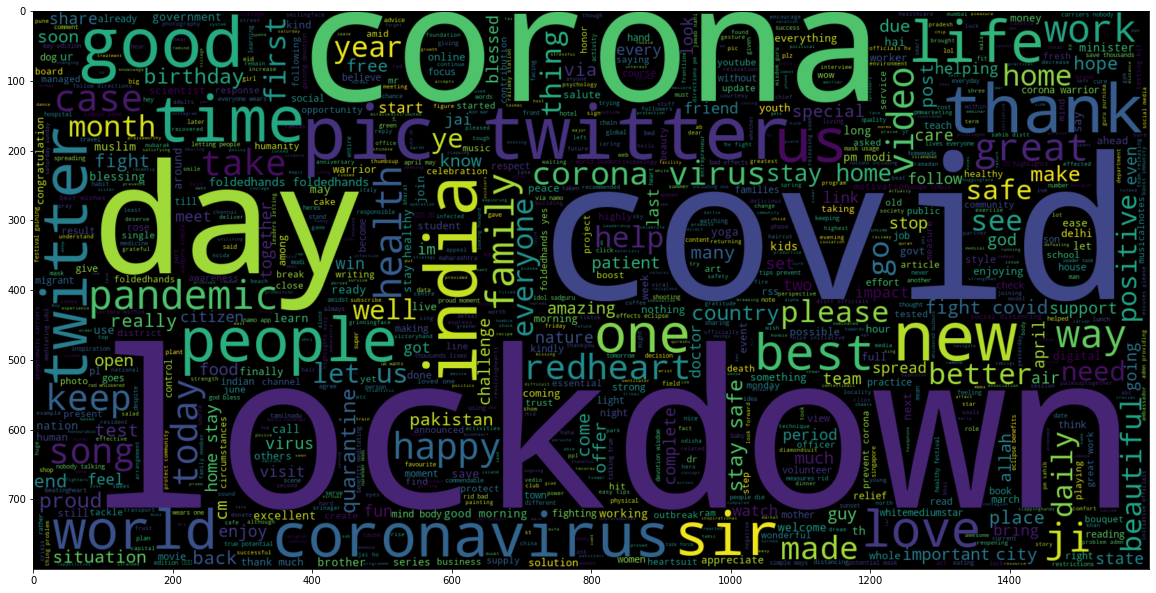

In [ ]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(data[data['sentiment']=='joy']['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

In [ ]:
data

,sentiment,text,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, poor, india, treated, badly, poors, se...",agree poor india treated badly poors seek livi...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[could, spent, cutie, vc, sakshis, coast, cros...",could spent cutie vc sakshis coast crossing re...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[nature, conservation, remain, priority, post,...",nature conservation remain priority post coron...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, italy, show, intel...",coronavirus disappearing italy show intellectu...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol...",uk records lowest daily virus death toll since...
...,...,...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...,"[today, pm, year, old, bangladeshi, male, admi...",today pm year old bangladeshi male admitted tr...
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...,"[corona, virus, implore, cease, activity, apri...",corona virus implore cease activity april st n...
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...,"[issa, date, lockdown, ends, inshaallah, coron...",issa date lockdown ends inshaallah corona redh...
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...,"[death, toll, due, covid, rose, jammu, kashmir...",death toll due covid rose jammu kashmir third ...


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# word_tokenize is used to break up a string into words
print(data['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(data['Text Without Punc & Stopwords Joined'][0]))

agree poor india treated badly poors seek living singapore treated like citizens given free medical treatment given food daily sim cards call home tell family fine covid case treated foc hospitals
['agree', 'poor', 'india', 'treated', 'badly', 'poors', 'seek', 'living', 'singapore', 'treated', 'like', 'citizens', 'given', 'free', 'medical', 'treatment', 'given', 'food', 'daily', 'sim', 'cards', 'call', 'home', 'tell', 'family', 'fine', 'covid', 'case', 'treated', 'foc', 'hospitals']


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in data['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 44


In [ ]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in data['Text Without Punc & Stopwords Joined'] ]
tweets_length

[31,
 8,
 9,
 9,
 11,
 12,
 28,
 5,
 25,
 24,
 13,
 5,
 19,
 20,
 9,
 30,
 6,
 7,
 8,
 7,
 17,
 2,
 28,
 30,
 5,
 16,
 6,
 7,
 12,
 6,
 12,
 7,
 11,
 18,
 25,
 14,
 15,
 12,
 6,
 11,
 19,
 9,
 23,
 12,
 12,
 14,
 14,
 25,
 8,
 12,
 10,
 25,
 23,
 5,
 8,
 9,
 16,
 9,
 7,
 9,
 29,
 22,
 4,
 6,
 23,
 21,
 24,
 9,
 23,
 11,
 7,
 9,
 18,
 25,
 19,
 2,
 16,
 11,
 6,
 8,
 16,
 11,
 6,
 5,
 27,
 6,
 28,
 18,
 16,
 12,
 15,
 23,
 11,
 16,
 21,
 14,
 15,
 2,
 15,
 18,
 4,
 6,
 19,
 8,
 22,
 22,
 13,
 9,
 22,
 9,
 16,
 13,
 18,
 9,
 14,
 17,
 2,
 17,
 14,
 18,
 22,
 8,
 20,
 8,
 9,
 24,
 25,
 10,
 5,
 7,
 14,
 8,
 7,
 26,
 11,
 29,
 24,
 12,
 18,
 18,
 29,
 15,
 27,
 7,
 23,
 25,
 15,
 31,
 23,
 28,
 9,
 23,
 12,
 16,
 19,
 16,
 1,
 25,
 12,
 15,
 23,
 6,
 9,
 17,
 25,
 21,
 9,
 24,
 16,
 23,
 24,
 29,
 6,
 3,
 21,
 11,
 13,
 24,
 3,
 10,
 10,
 14,
 29,
 11,
 28,
 8,
 4,
 26,
 8,
 4,
 24,
 22,
 28,
 10,
 20,
 17,
 26,
 10,
 18,
 12,
 5,
 3,
 8,
 10,
 19,
 7,
 6,
 5,
 8,
 8,
 4,
 9,
 22,
 11,
 24,

In [ ]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 100)
fig.show()

In [ ]:
data

,sentiment,text,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,"[agree, poor, india, treated, badly, poors, se...",agree poor india treated badly poors seek livi...
1,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,"[could, spent, cutie, vc, sakshis, coast, cros...",could spent cutie vc sakshis coast crossing re...
2,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,"[nature, conservation, remain, priority, post,...",nature conservation remain priority post coron...
3,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,"[coronavirus, disappearing, italy, show, intel...",coronavirus disappearing italy show intellectu...
4,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,"[uk, records, lowest, daily, virus, death, tol...",uk records lowest daily virus death toll since...
...,...,...,...,...,...
3085,sad,today at 02 30pm a 54 year old bangladeshi mal...,today at 02 30pm a 54 year old bangladeshi mal...,"[today, pm, year, old, bangladeshi, male, admi...",today pm year old bangladeshi male admitted tr...
3086,anger,corona virus i implore that you cease activity...,corona virus i implore that you cease activity...,"[corona, virus, implore, cease, activity, apri...",corona virus implore cease activity april st n...
3087,joy,issa date once lockdown ends inshaallah (and c...,issa date once lockdown ends inshaallah and co...,"[issa, date, lockdown, ends, inshaallah, coron...",issa date lockdown ends inshaallah corona redh...
3088,sad,the death toll due to covid 19 rose to 31 in j...,the death toll due to covid 19 rose to 31 in j...,"[death, toll, due, covid, rose, jammu, kashmir...",death toll due covid rose jammu kashmir third ...


In [ ]:
# Obtain the total words present in the dataset
list_of_words = []
for i in data['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)


In [ ]:
list_of_words

['agree',
 'poor',
 'india',
 'treated',
 'badly',
 'poors',
 'seek',
 'living',
 'singapore',
 'treated',
 'like',
 'citizens',
 'given',
 'free',
 'medical',
 'treatment',
 'given',
 'food',
 'daily',
 'sim',
 'cards',
 'call',
 'home',
 'tell',
 'family',
 'fine',
 'covid',
 'case',
 'treated',
 'foc',
 'hospitals',
 'could',
 'spent',
 'cutie',
 'vc',
 'sakshis',
 'coast',
 'crossing',
 'republik',
 'nature',
 'conservation',
 'remain',
 'priority',
 'post',
 'corona',
 'bangladesh',
 'daily',
 'star',
 'coronavirus',
 'disappearing',
 'italy',
 'show',
 'intellectuals',
 'say',
 'lockdowns',
 'not',
 'work',
 'uk',
 'records',
 'lowest',
 'daily',
 'virus',
 'death',
 'toll',
 'since',
 'start',
 'lockdown',
 'govt',
 'joe',
 'bidens',
 'coronavirus',
 'web',
 'address',
 'lands',
 'donation',
 'page',
 'campaign',
 'profiting',
 'fear',
 'demopos',
 'respected',
 'sir',
 'telangana',
 'private',
 'teachers',
 'lecturers',
 'horrible',
 'situations',
 'due',
 'covid',
 'mainly',
 

In [ ]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

10129

In [ ]:
# split the data into test and train 
X = data['Text Without Punc & Stopwords']
yd = data.iloc[:,0]



In [ ]:
yd

0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yt = le.fit_transform(yd)

In [ ]:
y=[]

In [ ]:
for i in range(0,3090):
  if(yt[i]==2):
    y.append(1)
  else:
    y.append(0)

In [ ]:
set(y)

{0, 1}

In [ ]:
len(y)

3090

In [ ]:
y

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [ ]:
mined = pd.read_csv("...............",usecols=[1])

In [ ]:
mined['Text'][0]

'#COVID19 death toll breaches 900-mark in #Odisha '

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
mined['Text Without Punctuation'] = mined['Text'].apply(remove_punc)

In [ ]:
mined

,Text,Text Without Punctuation
0,#COVID19 death toll breaches 900-mark in #Odisha,COVID19 death toll breaches 900mark in Odisha
1,as per this data by @MoHFW_INDIA #Kerala is a...,as per this data by MoHFWINDIA Kerala is at t...
2,Not anymore.. #COVID19 #lockdown #Ontario #Do...,Not anymore COVID19 lockdown Ontario DougFord
3,White House Aids release photos of President #...,White House Aids release photos of President T...
4,@GovMikeDeWine @LtGovHusted Where is the Praye...,GovMikeDeWine LtGovHusted Where is the Prayer ...
...,...,...
6643,#SuperSpreaderTrump We can hear your breathing...,SuperSpreaderTrump We can hear your breathing ...
6644,Trump was a #superspreader of #disinformatin ...,Trump was a superspreader of disinformatin be...
6645,#LindseyGraham looks like he has #COVID19 #Lin...,LindseyGraham looks like he has COVID19 Lindse...
6646,ALERT: Raiders fined again for more COVID-19 t...,ALERT Raiders fined again for more COVID19 tro...


In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.remove('not')


In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 1 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# apply pre-processing to the text column
mined['Text Without Punc & Stopwords'] = mined['Text Without Punctuation'].apply(preprocess)

In [ ]:
# join the words into a string
mined['Text Without Punc & Stopwords Joined'] = mined['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

In [ ]:
# word_tokenize is used to break up a string into words
print(mined['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(mined['Text Without Punc & Stopwords Joined'][0]))

covid death toll breaches mark odisha
['covid', 'death', 'toll', 'breaches', 'mark', 'odisha']


In [ ]:
mined

,Text,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,#COVID19 death toll breaches 900-mark in #Odisha,COVID19 death toll breaches 900mark in Odisha,"[covid, death, toll, breaches, mark, odisha]",covid death toll breaches mark odisha
1,as per this data by @MoHFW_INDIA #Kerala is a...,as per this data by MoHFWINDIA Kerala is at t...,"[per, data, mohfwindia, kerala, bottom, recove...",per data mohfwindia kerala bottom recovery rat...
2,Not anymore.. #COVID19 #lockdown #Ontario #Do...,Not anymore COVID19 lockdown Ontario DougFord,"[not, anymore, covid, lockdown, ontario, dougf...",not anymore covid lockdown ontario dougford
3,White House Aids release photos of President #...,White House Aids release photos of President T...,"[white, house, aids, release, photos, presiden...",white house aids release photos president trum...
4,@GovMikeDeWine @LtGovHusted Where is the Praye...,GovMikeDeWine LtGovHusted Where is the Prayer ...,"[govmikedewine, ltgovhusted, prayer, day, covi...",govmikedewine ltgovhusted prayer day covid dea...
...,...,...,...,...
6643,#SuperSpreaderTrump We can hear your breathing...,SuperSpreaderTrump We can hear your breathing ...,"[hear, breathing, difficulties, due, covid, kn...",hear breathing difficulties due covid know vir...
6644,Trump was a #superspreader of #disinformatin ...,Trump was a superspreader of disinformatin be...,"[trump, superspreader, disinformatin, became, ...",trump superspreader disinformatin became super...
6645,#LindseyGraham looks like he has #COVID19 #Lin...,LindseyGraham looks like he has COVID19 Lindse...,"[lindseygraham, looks, like, covid]",lindseygraham looks like covid
6646,ALERT: Raiders fined again for more COVID-19 t...,ALERT Raiders fined again for more COVID19 tro...,"[alert, raiders, fined, covid, trouble, global...",alert raiders fined covid trouble global pande...


In [ ]:
# Obtain the maximum length of data in the document
# This will be later used when word embeddings are generated
maxlen = -1
for doc in mined['Text Without Punc & Stopwords Joined']:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 71


In [ ]:
# Obtain the total words present in the dataset
list_of_words1 = []
for i in mined['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words1.append(j)

In [ ]:
# Obtain the total number of unique words
total_words1 = len(list(set(list_of_words1)))
total_words= total_words+total_words1
total_words

28497

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_test= mined['Text Without Punc & Stopwords']

In [ ]:
X_train.shape

(2781,)

In [ ]:
X_test.shape

(6648,)

In [ ]:
X_train

99      [grabbing, bite, atl, cashier, took, text, ser...
2948    [year, old, boy, london, tested, positive, cov...
2194    [miss, corona, way, next, wave, malaysia, mco,...
1462    [new, season, going, performed, behind, locked...
2218    [coronavirus, nature, dude, even, faithful, no...
                              ...                        
1973    [coronavirus, caused, not, potus, trump, hatin...
828           [seen, coronavirus, porn, plots, lmfaooooo]
416     [wicked, nancy, take, credit, good, comes, whi...
2299    [announced, new, guidelines, lockdown, better,...
130     [public, areas, buildings, owned, around, temp...
Name: Text Without Punc & Stopwords, Length: 2781, dtype: object

In [ ]:
X_test

0            [covid, death, toll, breaches, mark, odisha]
1       [per, data, mohfwindia, kerala, bottom, recove...
2       [not, anymore, covid, lockdown, ontario, dougf...
3       [white, house, aids, release, photos, presiden...
4       [govmikedewine, ltgovhusted, prayer, day, covi...
                              ...                        
6643    [hear, breathing, difficulties, due, covid, kn...
6644    [trump, superspreader, disinformatin, became, ...
6645                  [lindseygraham, looks, like, covid]
6646    [alert, raiders, fined, covid, trouble, global...
6647    [pandemic, archive, digital, artist, jon, ostr...
Name: Text Without Punc & Stopwords, Length: 6648, dtype: object

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X)#X_train   tha 

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)


In [ ]:
train_sequences

[[2959,
  4451,
  4452,
  4453,
  480,
  4454,
  2190,
  1040,
  4455,
  1,
  2,
  1058,
  9,
  2960,
  121,
  1210,
  307,
  112],
 [61, 125, 1178, 1427, 208, 138, 4, 222, 1187, 706, 9849, 3435, 1, 1344],
 [427, 3, 77, 163, 2801, 4141, 8443, 2070],
 [29, 510, 16, 7038, 1027, 769, 2755],
 [1, 514, 742, 56, 8492, 2, 4144, 8493, 117, 15, 1205, 38, 2086, 67],
 [1243, 1027, 3179, 97, 173, 32, 2017, 23, 2197],
 [9944,
  1522,
  74,
  218,
  414,
  1119,
  9945,
  9946,
  2790,
  1224,
  865,
  2793,
  22,
  2,
  211,
  1911,
  26],
 [2014, 320, 7413, 539, 2082, 5, 2024, 709, 49],
 [1277,
  12,
  4,
  3946,
  215,
  45,
  6,
  215,
  375,
  455,
  1772,
  12,
  4,
  436,
  2344,
  992,
  4268,
  2344,
  9753,
  37,
  690,
  1543,
  4268,
  320,
  3,
  9754,
  45,
  9755,
  403,
  1238],
 [457,
  13,
  4,
  22,
  1852,
  28,
  1813,
  2389,
  135,
  874,
  216,
  79,
  182,
  148,
  22,
  1852,
  329,
  677,
  874,
  3257,
  1305,
  756,
  216,
  160,
  604,
  5142],
 [335, 77, 2291, 3087, 47

In [ ]:
test_sequences

[[4, 38, 207, 1381, 867],
 [831,
  556,
  1801,
  3706,
  1483,
  253,
  325,
  4048,
  25,
  32,
  72,
  38,
  253,
  37,
  4288,
  99,
  615,
  2079,
  25,
  1015,
  1027,
  767,
  2717,
  1277,
  4,
  4],
 [2, 1269, 4, 5],
 [460, 248, 1398, 2167, 139, 24, 183, 1030, 4],
 [7786, 23, 4, 311, 224],
 [27, 381, 508, 4, 698, 87, 5893, 575, 782, 3688, 252, 138, 438, 3360],
 [4,
  7,
  2,
  28,
  59,
  29,
  25,
  9,
  311,
  27,
  52,
  22,
  378,
  2092,
  484,
  97,
  1608,
  534,
  245,
  22,
  4,
  1],
 [4, 867, 207, 1381, 2721, 1121, 75],
 [80, 1873, 965, 4],
 [2210, 4, 571],
 [4, 3619, 1120],
 [3987, 533, 137, 303, 138, 4],
 [4, 9482, 272, 474, 3113, 294, 44],
 [393, 483, 37, 393, 2114, 1439, 1678, 851, 14, 4, 1377, 209, 49, 806, 2778],
 [50, 20, 454, 5584, 3124, 3125, 167, 17, 4],
 [4, 138, 593, 24, 448, 1914, 6, 4752, 944, 56, 151, 652, 4, 1],
 [3617,
  17,
  166,
  306,
  18,
  17,
  489,
  8498,
  222,
  1086,
  2002,
  405,
  4228,
  1109,
  130,
  4,
  4228,
  2107],
 [8358, 59

In [ ]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 2948    [year, old, boy, london, tested, positive, cov...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [61, 125, 1178, 1427, 208, 138, 4, 222, 1187, 706, 9849, 3435, 1, 1344]


In [ ]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 71, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 71, padding='post', truncating = 'post')

In [ ]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [2959 4451 4452 4453  480 4454 2190 1040 4455    1    2 1058    9 2960
  121 1210  307  112    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 2  is: [  61  125 1178 1427  208  138    4  222 1187  706 9849 3435    1 1344
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
The padded encoding for document: 3  is: [ 427    3   77  163 2801 4141 8443 2070    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0 

In [ ]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
#y_test_cat = to_categorical(y_test, 2)

In [ ]:
y_train_cat.shape

(2781, 2)

In [ ]:
#y_test_cat.shape

In [ ]:
y_train_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 256))

model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         7295232   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 7,722,626
Trainable params: 7,722,626
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 15)

Epoch 1/15
70/70 [==============================] - 26s 364ms/step - loss: 0.4651 - acc: 0.7900 - val_loss: 0.2749 - val_acc: 0.8833
Epoch 2/15
70/70 [==============================] - 25s 350ms/step - loss: 0.1189 - acc: 0.9609 - val_loss: 0.3244 - val_acc: 0.8600
Epoch 3/15
70/70 [==============================] - 25s 351ms/step - loss: 0.0427 - acc: 0.9843 - val_loss: 0.3370 - val_acc: 0.8851
Epoch 4/15
70/70 [==============================] - 25s 353ms/step - loss: 0.0091 - acc: 0.9969 - val_loss: 0.5856 - val_acc: 0.8797
Epoch 5/15
70/70 [==============================] - 25s 353ms/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.6897 - val_acc: 0.8797
Epoch 6/15
70/70 [==============================] - 25s 350ms/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.7844 - val_acc: 0.8743
Epoch 7/15
70/70 [==============================] - 25s 353ms/step - loss: 0.0019 - acc: 0.9991 - val_loss: 0.7066 - val_acc: 0.8815
Epoch 8/15
70/70 [==============================] - 25s 351ms/step - 

In [ ]:
# make prediction
pred = model.predict(padded_test)

In [ ]:
pred

array([[9.9999845e-01, 1.4930442e-06],
       [9.9978882e-01, 2.1115286e-04],
       [9.9971575e-01, 2.8423354e-04],
       ...,
       [4.2871243e-01, 5.7128757e-01],
       [9.9997473e-01, 2.5325307e-05],
       [3.5928020e-01, 6.4071983e-01]], dtype=float32)

In [ ]:
# make prediction
prediction = []
for i in pred:
  #print(i)
  prediction.append(np.argmax(i))

In [ ]:
# importing pandas as pd  
import pandas as pd  
   
# list of name, degree, score 

# dictionary of lists  
dict = {'Text':mined['Text'], ' predicted sentiment': prediction}  
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('file2.csv') 